---
title: "Unsupervised Learning"
format:
    html: 
        code-fold: false
---

<!-- After digesting the instructions, you can delete this cell, these are assignment instructions and do not need to be included in your final submission.  -->

<!-- {{< include instructions.qmd >}} -->

# Introduction and Motivation:
In this analysis, we aim to identify anomalous trends hidden in the dataset and apply different clustering and dimensionality reduction techniques to our cleaned YouTube video dataset, which includes both textual(topics of video, tages of video, or topic of video) and numerical data(view counts of video, like counts of video, etc.). We calculated the average engagement rate per video by subscribers on YouTube is calculated as the total engagement (likes, comments, and dislikes) divided by the number of videos the profile published [@socialinsider_engagement_rate]. The result is then divided by the number of subscribers, and all multiplied by 100. The goal is to gain insights into the underlying structure of the dataset by reducing its high dimensionality and identifying meaningful patterns. We will apply methods such as PCA, t-SNE, K-Means, DBSCAN, and Agglomerative Clustering to understand how each technique performs in capturing the data's inherent structure. By tuning the hyperparameters and evaluating model performance, we seek to uncover hidden relationships in the data and visualize the results for easier interpretation. This analysis will help us assess the suitability of each method for this particular dataset, guiding future decisions for clustering and dimensionality reduction in more complex datasets.

# Overview of Methods
#### Part1: Dimensionality Reduction
1. **PCA (Principal Component Analysis):**
   - **WHAT**: Principal Component Analysis (PCA) is a technique used for dimensionality reduction by transforming data into a set of linearly uncorrelated variables called principal components. PCA projects the original data onto new axes, which capture the maximum variance in the data, making it easier to analyze. [@gpt4o-pca]
   - **WHY**: Our Youtube Video dataset contains high-dimensional data, applying PCA makes it easier to visualize and interpret. Since PCA identifies directions (principal components) in which the data has the most variance, retaining the most important patterns of the data in fewer dimensions, we want to apply it to reduce the dimension of our data input. By eliminating less significant components, PCA can help reduce noise in the data. However, we suspect that PCA would not be most suitable one for our dataset, because PCA assumes linear separability in the data. It may not perform well on data with nonlinear relationships.
   - **HOW**: 
     - *Expected input*: The input data, should be a matrix where rows are data points and columns are features. 
     - *Expected output*: The transformed data with reduced dimensions. It will have fewer columns than the original dataset, corresponding to the principal components that capture the most variance in the data.
     - *Expected parameter*: We will tuned the hyperparameters iteratively to find the optimal number of components that explain the maximum variance in the data. The best value is selected based on the cumulative explained variance ratio.

2. **t-SNE (t-Distributed Stochastic Neighbor Embedding):**
   - **WHAT**: t-SNE is a nonlinear dimensionality reduction technique primarily used for visualizing high-dimensional datasets. Unlike PCA, t-SNE focuses on preserving local structures by minimizing the divergence between probability distributions that represent pairwise similarities in the high-dimensional space and the corresponding low-dimensional representation. It is commonly used to visualize data with complex patterns or clusters that may not be captured by linear methods. [@gpt4o-tsne]
   - **WHY**: Our YouTube Video dataset contains both textual and numerical data with complex relationships, so the relationship between feature are most likely non-linear. Since t-SNE is designed to preserve local structures and reveal clusters that might be hidden in high-dimensional space, it fits well for this dataset. By reducing the dimensionality, we would expect t-SNE allows for better visualization of the relationships between data points.
   - **HOW**: 
     - *Expected input*: The input data should be a high-dimensional matrix, where each row represents a data point, and columns represent features. The data could include numerical features, as well as features transformed from text (e.g., using TF-IDF vectorization).
     - *Expected output*: The transformed data will be in a lower-dimensional space, suitable for visualization. Each point in the new space represents the original data, with similar points being close together, making patterns or clusters more evident.
     - *Expected parameter*: The primary parameter to tune in t-SNE is **perplexity**, which influences the balance between local and global aspects of the data. The optimal perplexity value is selected by iterating through a range of values and evaluating the resulting t-SNE output based on metrics such as KL divergence.



#### Part 2: Clustering

1. **Agglomerative Clustering** is a hierarchical clustering method that builds a cluster tree (dendrogram) from the bottom up. It starts with each data point as its own cluster and iteratively merges the closest clusters until all points belong to a single cluster or until a predefined number of clusters is reached.
   - **Why**: Our YouTube video dataset contains both textual and numerical data, so we believe that using Agglomerative Clustering will provide more flexibility in capturing complex cluster shapes compared to other methods like K-Means. Additionally, since we don't have predefined labels in our dataset, Agglomerative Clustering is a suitable choice because it doesn’t require the number of clusters to be specified beforehand. 
   - This flexibility makes it a useful tool for analyzing the diverse nature of the YouTube video data, which may exhibit non-spherical cluster shapes that other methods like K-Means may struggle to identify.

1. **BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies)** is a clustering algorithm designed for large datasets. It combines hierarchical clustering with the construction of CF (Clustering Feature) trees and iterative refinement to handle large-scale data efficiently.
   - **Why**: Our YouTube video dataset is relatively large, containing 2204 rows of video data. Therefore, BIRCH is well-suited to handle the size of our dataset, providing both efficient memory usage and scalable performance. By reducing the dimensionality and clustering in an incremental manner, BIRCH efficiently manages large data volumes without overwhelming system resources, making it an ideal choice for our project’s scale. 
   - Moreover, BIRCH’s ability to handle large datasets while maintaining high performance ensures that it can produce meaningful cluster patterns without excessive computational overhead.

2. **K-Means** is one of the most widely used and simple clustering algorithms. It randomly selects *K* initial centroids, assigns points to clusters based on the distance to the centroids, and updates the centroids by recalculating the mean of the points in each cluster. The algorithm partitions the data into a predefined number of clusters while minimizing the variance within each cluster.
   - **Why**: We included K-Means as a clustering method because it is computationally efficient, with a time complexity of O(n * K * i), where *n* is the number of points, *K* is the number of clusters, and *i* is the number of iterations. K-Means scales well to large datasets, and it is easy to implement and understand.
   -  We will tune the number of clusters by calculating the silhouette score to determine the optimal *K*, which also helps mitigate the sensitivity to outliers and the initial placement of centroids.

3. **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)** is a density-based clustering algorithm that groups points based on their proximity and a minimum number of points required in the neighborhood. It can detect arbitrarily shaped clusters and is particularly effective at identifying outliers—points that do not belong to any cluster.
   - **Why**: Before applying dimensionality reduction and clustering, we transformed our textual data (e.g., video topics, tags) into numerical values using TF-IDF vectorization and scaled the preprocessed data with StandardScaler. Since DBSCAN does not require specifying the number of clusters in advance, it aligns well with our dataset, which lacks labels. 
   - Being density-based, DBSCAN can detect clusters of any shape, offering greater flexibility than K-Means. It is also effective at identifying outliers, which are assigned to no cluster, making it a good choice for handling noise in the YouTube dataset.




# Code 

Providing the source code used for this section of the project here.

In [1]:
import pandas as pd
import sklearn.cluster
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import sklearn.cluster as skcluster
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from wordcloud import WordCloud


In [2]:
data = pd.read_csv("../../data/processed-data/cleaned_data.csv")
data.head()

,video_id,channelTitle,title,tags,publishedAt,viewCount,likeCount,dislikeCount,favoriteCount,commentCount,duration,definition,caption,topicCategories,popularity,popularity_multi_class
0,b6FTKe-u8XI,Richard Restatement,Can I get scout badgetherookie viralvideo fory...,NaN,2024-11-20T22:42:00Z,0.049597,0.139295,NaN,0,0.009236,59,hd,False,Entertainment Film,high,high
1,W_19sjpQttw,Succesful Celebrity,Bill Nye The Science Guy Shows Kai Cenat A Sci...,kai cenat kai cenat imkaicenat amp kai cenat l...,2024-11-17T17:01:47Z,0.082768,0.193623,NaN,0,0.033605,26,hd,False,Entertainment Film Television_program,high,high
2,udVz8GN_DP0,Kieran Ta,Youre not gonna hit me again are you supernatu...,NaN,2024-11-18T03:13:34Z,0.045601,0.105196,NaN,0,0.007719,58,hd,False,Entertainment Film Television_program,high,high
3,iOecn1gSBZY,M2M Heart,Open the cash with moneyThis is funniest robbe...,NaN,2024-11-16T13:00:53Z,0.070301,0.179141,NaN,0,0.013535,59,hd,False,Entertainment Film,high,high
4,u1IuChCXplQ,9-1-1 house,He realized that they did not stop death,NaN,2024-11-20T19:52:08Z,0.032618,0.069746,NaN,0,0.007707,60,hd,False,Entertainment Film,high,high


In [3]:
data["dislikeCount"] = data["dislikeCount"].fillna(0)
data["favoriteCount"] = data["favoriteCount"].astype(float)
data["duration"] = data["duration"].astype(int)
data['topicCategories'] = data['topicCategories'].fillna('')  # Handle NaN values
data['tags'] = data['tags'].fillna('')  # Handle NaN values
data['engagement_rate'] = (data["likeCount"] + data["dislikeCount"] + data["favoriteCount"] + data["commentCount"]) / data["viewCount"]
data = data[['title', 'tags', 'viewCount',
       'likeCount', 'dislikeCount', 'favoriteCount', 'commentCount',
       'duration', 'topicCategories', 'engagement_rate']]

data.dropna(axis=0, inplace=True)

In [4]:
cate_trans = TfidfVectorizer(stop_words="english")
trans_titles = cate_trans.fit_transform(data["title"]).toarray()
trans_tags = cate_trans.fit_transform(data["tags"]).toarray()
trans_topics = cate_trans.fit_transform(data["topicCategories"]).toarray()


In [5]:
scaler = StandardScaler()
data_subset=data[['viewCount',
       'likeCount', 'dislikeCount', 'favoriteCount', 'commentCount',
       'duration', 'engagement_rate']]
data_subset = data_subset.replace([np.inf, -np.inf], np.nan).fillna(0)

scaled_numerical_features = scaler.fit_transform(data_subset)
scaled_titles = scaler.fit_transform(trans_titles)
scaled_tags = scaler.fit_transform(trans_tags)
scaled_topics = scaler.fit_transform(trans_topics)
combined_features = np.hstack((scaled_numerical_features, scaled_titles, scaled_tags, scaled_topics))
combined_features.shape

(2130, 14131)

## Part 1: Dimensionality Reduction

1. **PCA (Principal Component Analysis):**

2. **t-SNE (t-distributed Stochastic Neighbor Embedding):**

3. **Evaluation and Comparison:**



In [6]:
def dimensionality_reduction(X, method="pca"):
    """Dimensionality reduction with PCA or t-SNE, includes hyperparameter tuning.

    Raises:
        ValueError: if providing unsupported dimension reduction method name

    Returns:
        _type_: data has dimension reduced
    """
    if method.lower() == "pca":
        best_n_component = 2
        best_var = 0
        print("Tuning PCA number of components...")

        for n in range(2, 50, 5):
            pca = PCA(n_components=n)
            X_pca = pca.fit_transform(X)
            exp_var = np.cumsum(pca.explained_variance_ratio_)
            print(f"Number of componenets: {n}, Explained Variance Ratio: {exp_var[-1]}")
            if exp_var[-1] > best_var:  # Compare the last cumulative variance
                best_n_component = n
                best_var = exp_var[-1]  # Update best variance

        pca = PCA(n_components=best_n_component)
        X_pca = pca.fit_transform(X)
        print(f"Best number of components: {best_n_component}, Explained Variance Ratio: {best_var}")
        return X_pca

    elif method.lower() == "tsne":
        best_perplexity = None
        best_kl_divergence = float('inf')
        tuned_tsne = None

        print("Tuning t-SNE perplexity...")
        for perplexity in [5, 10, 30, 50]:
            tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
            X_transformed = tsne.fit_transform(X)
            kl_divergence = tsne.kl_divergence_
            print(f"Perplexity: {perplexity}, KL Divergence: {kl_divergence}")
            if kl_divergence < best_kl_divergence:
                best_kl_divergence = kl_divergence
                best_perplexity = perplexity
                tuned_tsne = X_transformed

        print(f"Best Perplexity: {best_perplexity}, Best KL Divergence: {best_kl_divergence}")
        return tuned_tsne

    else:
        raise ValueError("Unsupported dimensionality reduction method.")


In [7]:
x_raw_pca = dimensionality_reduction(combined_features, method="PCA")
x_raw_tsne = dimensionality_reduction(combined_features, method="TSNE")

Tuning PCA number of components...
Number of componenets: 2, Explained Variance Ratio: 0.007621356137330164
Number of componenets: 7, Explained Variance Ratio: 0.023568496533213433
Number of componenets: 12, Explained Variance Ratio: 0.03691464799856191
Number of componenets: 17, Explained Variance Ratio: 0.04850314466749101
Number of componenets: 22, Explained Variance Ratio: 0.059166877699340335
Number of componenets: 27, Explained Variance Ratio: 0.06940027107590181
Number of componenets: 32, Explained Variance Ratio: 0.07933031287387941
Number of componenets: 37, Explained Variance Ratio: 0.08902957786542476
Number of componenets: 42, Explained Variance Ratio: 0.0984258666124817
Number of componenets: 47, Explained Variance Ratio: 0.10750359448628671
Best number of components: 47, Explained Variance Ratio: 0.10750359448628671
Tuning t-SNE perplexity...
Perplexity: 5, KL Divergence: 5.56992769241333
Perplexity: 10, KL Divergence: 4.418832302093506
Perplexity: 30, KL Divergence: 3.35

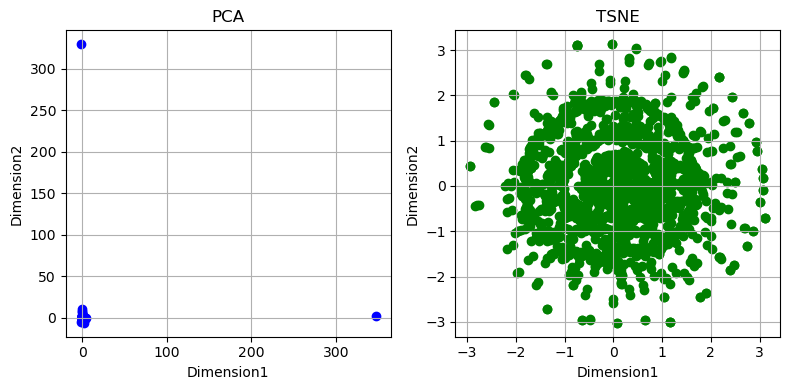

In [8]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))  # 1 row, 2 columns

# First scatter plot
ax1.scatter(x_raw_pca[:,0], x_raw_pca[:,1], color='blue')  
ax1.set(xlabel='Dimension1', ylabel='Dimension2')
ax1.grid()
ax1.set_title('PCA')

# Second scatter plot
ax2.scatter(x_raw_tsne[:,0], x_raw_tsne[:,1], color='green')  
ax2.set(xlabel='Dimension1', ylabel='Dimension2')
ax2.grid()
ax2.set_title('TSNE')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()

By placing the scatter plots of PCA and t-SNE side by side, we can see that the PCA scatter plot only shows three clusters visiblely. The reason for this is the linear nature of PCA, which assumes that the data's primary patterns can be captured by linear combinations of the features. 

This finding aligns with our assumption: if the data contains nonlinear relationships, PCA may not fully represent its structure, leading to a less informative visualization. Additionally, feature scaling could affect the outcome. In contrast, t-SNE excels at capturing nonlinear relationships, which is why its visualization shows a more meaningful, circular pattern. The flexibility of t-SNE allows it to reveal complex clustering structures that PCA might miss.


## Part 2: Clustering Methods

Apply clustering techniques (K-Means, DBSCAN, and Hierarchical clustering) to a selected dataset. 

1. **Clustering Methods**
   - Apply **K-Means**, **DBSCAN**, and **Hierarchical clustering** to dataset.

2. **Results Section**

3. **Conclusion**

In [9]:
def plot_2D(X,color_vector, modelName):
    """Draw 2D scatter plots for data and predicted labels

    Args:
        X (array): data
        color_vector (array): predicted labels
        modelName (str): title on the plot
    """
    fig, ax = plt.subplots()
    ax.scatter(X[:,0], X[:,1],c=color_vector, cmap='viridis',alpha=0.5)  
    ax.set(xlabel='Dimension1', ylabel='Dimension2',
    title=f'{modelName}')
    ax.grid()
    plt.show()


def calculate_optimal_clustering(X, algo="kmeans", nmax=20):
    """
    Calculate the optimal clustering parameter and labels based on silhouette scores.

    Parameters:
        X (array-like): Input data for clustering.
        algo (str): Clustering algorithm ("birch", "ag", "dbscan", "kmeans").
        nmax (int): Maximum range for hyperparameter tuning.

    Returns:
        tuple: Optimal parameter, labels, and silhouette scores for each parameter.
    """
    # Ensure `X` is contiguous
    # X = X.toarray()
    
    # Initialize variables
    params = []
    sil_scores = []
    sil_max = -10
    opt_param = None
    opt_labels = None

    for p in range(2, nmax + 1):
        if algo.lower() == "birch":
            model = skcluster.Birch(n_clusters=p)
            pred_labels = model.fit_predict(X)

        elif algo.lower() == "ag":
            model = skcluster.AgglomerativeClustering(n_clusters=p)
            pred_labels = model.fit_predict(X)

        elif algo.lower() == "dbscan":
            eps = p * 0.25  # Adjust `eps` for DBSCAN
            model = skcluster.DBSCAN(eps=eps, min_samples=2) 
            pred_labels = model.fit_predict(X)

        elif algo.lower() == "kmeans":
            model = skcluster.KMeans(n_clusters=p, random_state=42)
            pred_labels = model.fit_predict(X)

        else:
            raise ValueError("Unsupported clustering algorithm.")
        
        # Compute silhouette score
        try: 
            sil_score = silhouette_score(X, pred_labels)
            sil_scores.append(sil_score)
            params.append(p)
        except:
            continue

        if sil_score >= sil_max:
            sil_max = sil_score
            opt_param = p
            opt_labels = pred_labels

    if not sil_scores:
        raise ValueError("No valid silhouette scores found. Ensure your data and parameters are suitable for clustering.")
    
    return opt_param, opt_labels, params, sil_scores


def plot_silhouette_scores(params, sil_scores, algo):
    """
    Plot silhouette scores against clustering parameters.

    Parameters:
        params (list): List of clustering parameters.
        sil_scores (list): Corresponding silhouette scores for each parameter.
        algo (str): Clustering algorithm name (for title).

    Returns:
    a line plot of Silhouette Score in different parameter values
    """
    plt.figure(figsize=(8, 6))
    plt.plot(params, sil_scores, marker='o', label="Silhouette Score")
    plt.xlim(1, max(params) + 1)
    plt.xlabel("Parameter")
    plt.ylabel("Silhouette Score")
    plt.title(f"Silhouette Scores for {algo.lower()} Clustering")
    plt.legend()
    plt.grid()
    plt.show()


Tuning PCA number of components...
Number of componenets: 2, Explained Variance Ratio: 0.007622876451205808
Number of componenets: 7, Explained Variance Ratio: 0.02356908405705091
Number of componenets: 12, Explained Variance Ratio: 0.036920049979048984
Number of componenets: 17, Explained Variance Ratio: 0.04855698535454517
Number of componenets: 22, Explained Variance Ratio: 0.05915508579096912
Number of componenets: 27, Explained Variance Ratio: 0.06930950728830565
Number of componenets: 32, Explained Variance Ratio: 0.07930831947846977
Number of componenets: 37, Explained Variance Ratio: 0.08905551489624212
Number of componenets: 42, Explained Variance Ratio: 0.09837550758343419
Number of componenets: 47, Explained Variance Ratio: 0.10756753880097233
Best number of components: 47, Explained Variance Ratio: 0.10756753880097233


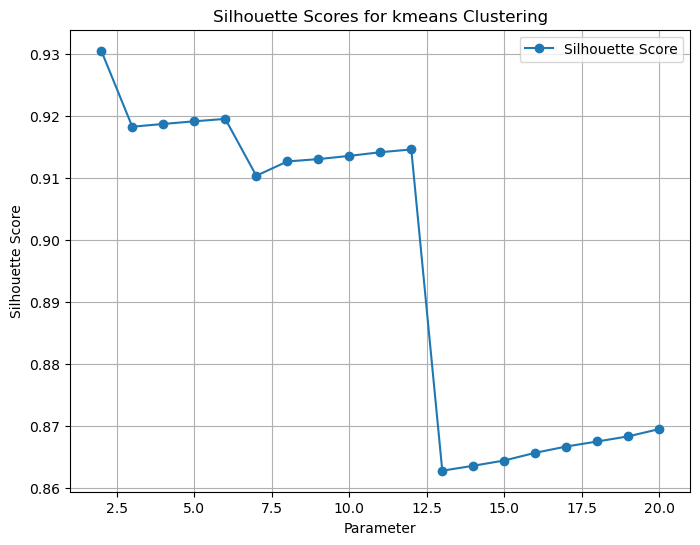

Optimal Parameter: 2
Number of Optimal Labels:  2130


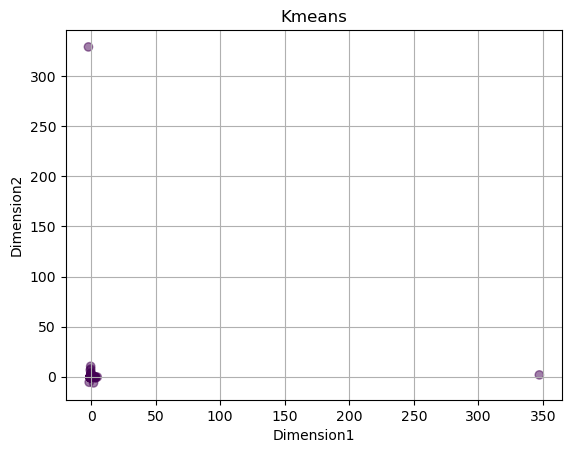

In [10]:
pca_X = dimensionality_reduction(combined_features, method="pca")
opt_param, opt_labels, params, sil_scores = calculate_optimal_clustering(pca_X, algo="kmeans")
plot_silhouette_scores(params, sil_scores, algo="kmeans")
print("Optimal Parameter:", opt_param)
print("Number of Optimal Labels: ", len(opt_labels))
plot_2D(pca_X, opt_labels, "Kmeans")

We tuned the number of components to fit PCA based on explained variance ratio and select 47 as the best parameter, which indicates it captures 10% of the variance in the dataset. Despite this relatively low explained variance, the K-Means clustering model identified 2 optimal clusters based on silhouette scores, with the PCA-transformed data. This means that K-Means effectively groups the 2130 data points into 2 clusters, although the PCA reduction retains only a portion of the total variance. The results suggest that PCA may not fully capture the complexity of the dataset.

Tuning t-SNE perplexity...
Perplexity: 5, KL Divergence: 5.56992769241333
Perplexity: 10, KL Divergence: 4.418832302093506
Perplexity: 30, KL Divergence: 3.3578200340270996
Perplexity: 50, KL Divergence: 2.8662688732147217
Best Perplexity: 50, Best KL Divergence: 2.8662688732147217


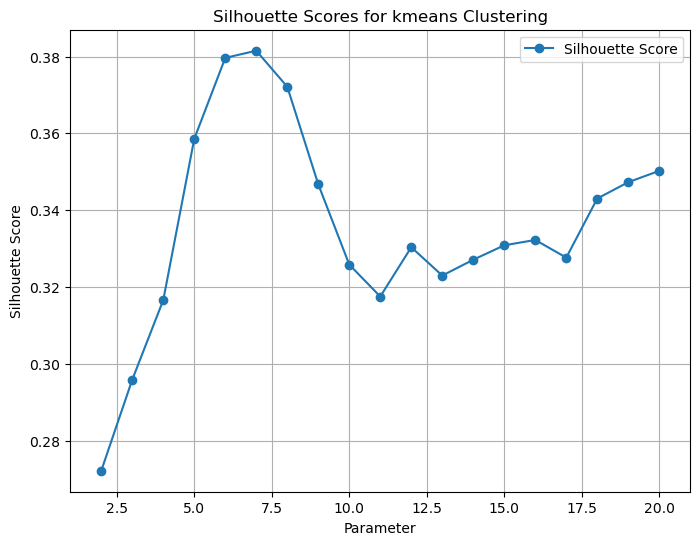

Optimal Parameter: 7
Number of Optimal Labels:  2130


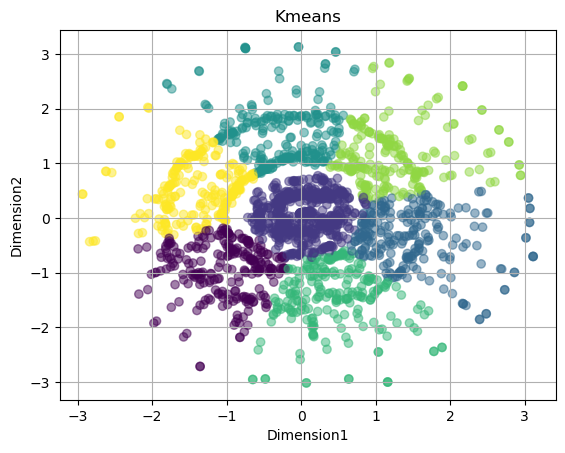

In [11]:
tsne_X = dimensionality_reduction(combined_features, method="tsne")
opt_param, opt_labels, params, sil_scores = calculate_optimal_clustering(tsne_X, algo="kmeans")
plot_silhouette_scores(params, sil_scores, algo="kmeans")
print("Optimal Parameter:", opt_param)
print("Number of Optimal Labels: ", len(opt_labels))
plot_2D(tsne_X, opt_labels, "Kmeans")

We tuned the value of perplexity to fit TSNE based on KL divergence score and received 50 as the best value of perplexity, which has the lowest difference between the pairwise similarities in the original high-dimensional space and the pairwise similarities in the lower-dimensional space after transformation. The Kmeans clustering model identified 7 optimal clusters based on silhouette scores, with the TSNE-transformed data. This means that K-Means effectively groups the 2130 data points into 7 clusters. The distribution of data points on the second scatter plot suggests that TSNE successfully captures the complexity of the dataset.

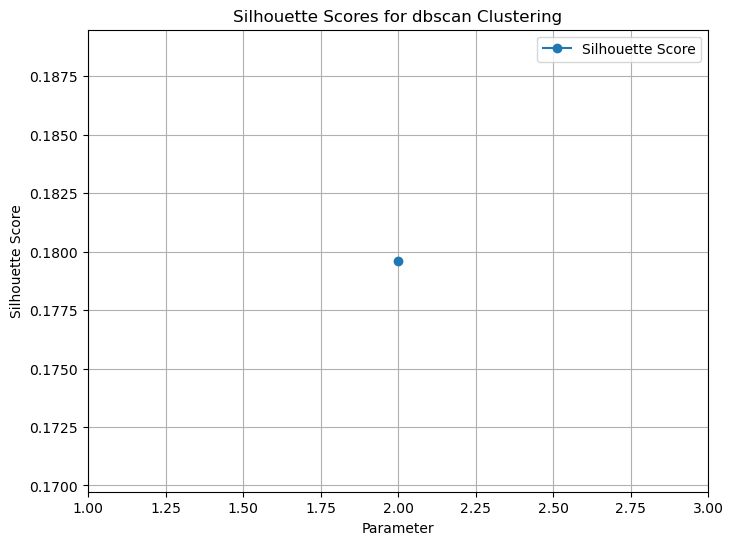

Optimal Parameter: 2
Number of Optimal Labels:  2130


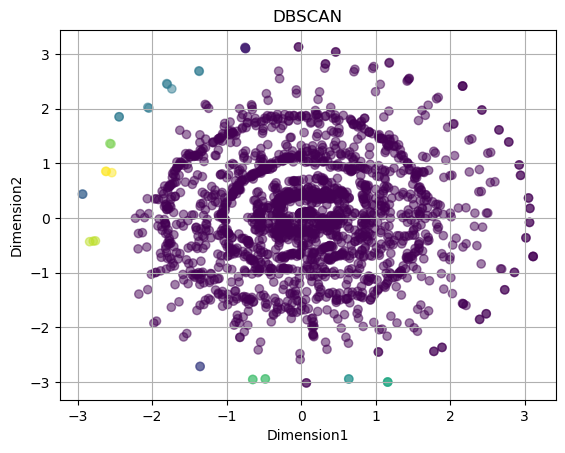

In [12]:
opt_param, opt_labels, params, sil_scores = calculate_optimal_clustering(tsne_X, algo="dbscan")
plot_silhouette_scores(params, sil_scores, algo="dbscan")
print("Optimal Parameter:", opt_param)
print("Number of Optimal Labels: ", len(opt_labels))
plot_2D(tsne_X, opt_labels, "DBSCAN")

In the section above, we applied t-SNE with a perplexity of 50 to reduce the dimensionality of the same dataset. Using the t-SNE-transformed data, the DBSCAN clustering model identified 2 optimal clusters based on silhouette scores. This means DBSCAN grouped the 2130 data points into 2 clusters. 

However, the scatter plot suggests that DBSCAN visually separates the data into three groups based on color. The separation appears less effective compared to the results achieved with K-Means, which provided clearer and more distinct clusters.

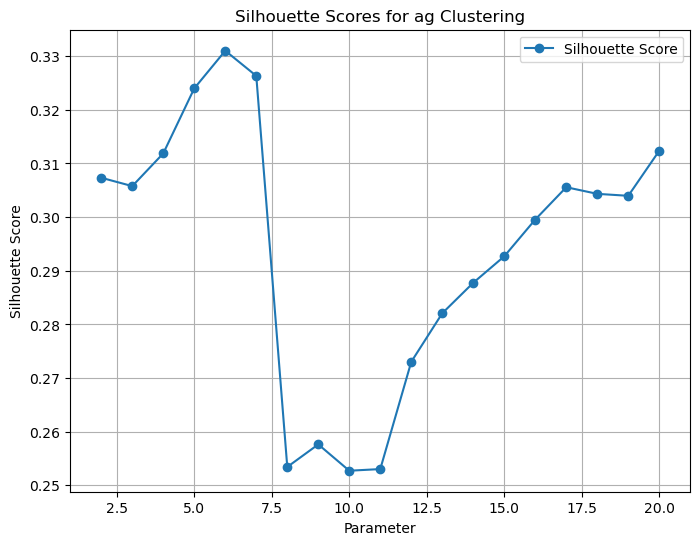

Optimal Parameter: 6
Number of Optimal Labels:  2130


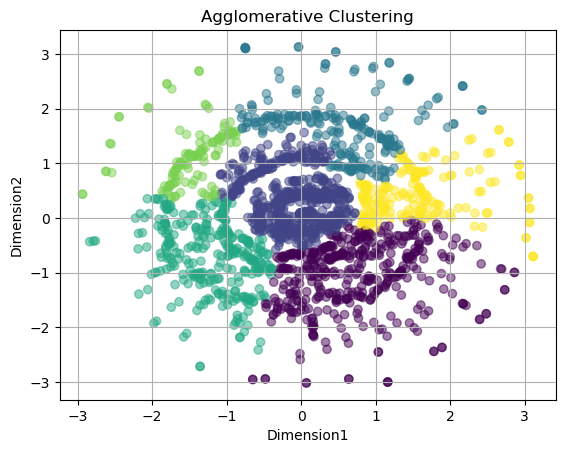

In [13]:
opt_param, opt_labels, params, sil_scores = calculate_optimal_clustering(tsne_X, algo="AG")
plot_silhouette_scores(params, sil_scores, algo="AG")
print("Optimal Parameter:", opt_param)
print("Number of Optimal Labels: ", len(opt_labels))
plot_2D(tsne_X, opt_labels, "Agglomerative Clustering")

In the section above, we applied t-SNE with a perplexity of 50 to reduce the dimensionality of the dataset. Using the t-SNE-transformed data, the Agglomerative Clustering model identified 6 optimal clusters based on silhouette scores. This result suggests that Agglomerative Clustering effectively groups the 2130 data points into 6 clusters, capturing some patterns within the dataset. The scatter plot further highlights how t-SNE successfully captures the complexity and nonlinear structure of the data, enabling meaningful clustering.  

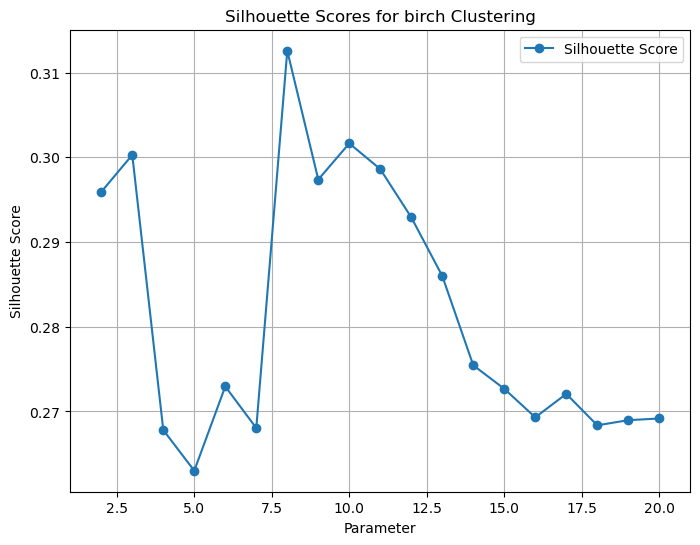

Optimal Parameter: 8
Number of Optimal Labels:  2130


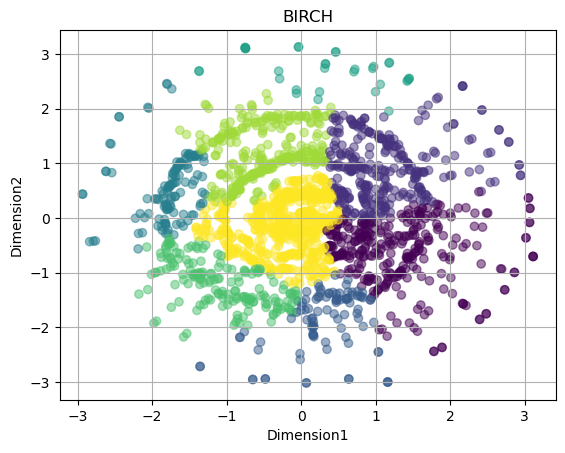

In [14]:
opt_param, opt_labels, params, sil_scores = calculate_optimal_clustering(tsne_X, algo="BIRCH")
plot_silhouette_scores(params, sil_scores, algo="BIRCH")
print("Optimal Parameter:", opt_param)
print("Number of Optimal Labels: ", len(opt_labels))
plot_2D(tsne_X, opt_labels, "BIRCH")

In the section above, we applied t-SNE with a perplexity of 50 to reduce the dimensionality of the dataset. Using the t-SNE-transformed data, the BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies) model identified 8 optimal clusters based on silhouette scores. This result indicates that BIRCH effectively groups the 2130 data points into 8 clusters, capturing key patterns within the dataset. 

The scatter plot illustrates that t-SNE successfully captures the dataset's complexity and nonlinear relationships, enabling meaningful clustering. When compared to the clustering results from K-Means, the outcomes are notably similar. This similarity can be attributed to BIRCH's approach of recursively compressing the data into a CF (Clustering Feature) tree and performing clustering on the summarized clusters, which can align well with the results of K-Means under certain data structures.

# Summary and Interpretation of Results


Our analysis involved applying dimensionality reduction techniques (PCA and t-SNE) followed by clustering methods (K-Means, Agglomerative Clustering, DBSCAN, and BIRCH) to a dataset of 2130 data points. Each approach offered unique insights into the structure and complexity of the data.

#### Key Findings:

**PCA Analysis:**

- PCA identified 47 components as optimal, explaining only around 10% of the dataset’s variance. This result highlights PCA’s limitation in representing data with nonlinear relationships, as the scatter plot revealed sparse clusters with limited separability.

**t-SNE Analysis:**

- t-SNE, with a perplexity of 50, produced a dense and meaningful circular visualization, capturing the dataset’s nonlinear patterns more effectively than PCA. The t-SNE-transformed data formed the foundation for more nuanced clustering.

The side by side visuals of PCA and T-SNE: t-SNE shows tightly packed clusters, which suggests the data is well-separated. Overlapping clusters in PCA suggests the need for nonlinear methods. The scatter plot help us to find the most suitable dimension reduction metric as T-SNE.

#### Clustering Results:

- **K-Means**: Identified 2 optimal clusters for PCA-transformed data and 7 clusters for t-SNE-transformed data, producing well-separated groupings. This highlights K-Means' effectiveness in capturing both linear and nonlinear patterns, especially in t-SNE space.
- **DBSCAN**: Detected 2 clusters for t-SNE data but exhibited less effective separation compared to K-Means, likely due to its sensitivity to noise and density thresholds.
- **Agglomerative Clustering**: Identified 6 clusters for t-SNE data, capturing local distribution patterns.  
- **BIRCH**: Found 8 clusters for t-SNE data, aligning closely with K-Means results, leveraging its CF-tree structure to summarize and cluster effectively.

Considering the theoretical background of the four clustering methods and their results in terms of the number of clusters, we can draw technical implications from the dataset:

- **Number of Clusters**: The number of clusters identified by K-Means, Agglomerative Clustering and BIRCH is around 7, suggesting that based on the attributes of the videos, they could be separated into approximately 7 clusters based on their similarities. DBSCAN identifies fewer clusters compared to K-Means, which may indicate the presence of noise or outliers in the data.
  
- **Cluster Sizes**: The clustering visualizations show that the sizes of clusters in three of the models (Agglomerative Clustering, BIRCH, and K-Means) are quite similar, suggesting a balance of data within each cluster. However, some points deviate from the cluster center, indicating the presence of outliers.
  
- **Cluster Overlaps**: From the clustering outputs of the four models (Agglomerative Clustering, BIRCH, K-Means, DBSCAN), we can see that while some data points are spread out or concentrated, the clusters usually do not overlap. This trend suggests clear segmentation within the data.
  
- **Outliers and Noise**: The plot of DBSCAN marks noise points that do not belong to any cluster. The data sparsity in the other three models suggests the presence of noise and the need for better preprocessing. Considering our case of analyzing YouTube video prevalence and factors leading to video popularity, we believe these outliers or noise points may correspond to viral or exceptional videos on YouTube.


### Validation and Discussion

By inserting the predicted labels into the original dataset and analyzing the statistical distribution of features such as viewCount, likeCount, and commentCount by cluster label, along with generating word clouds for video topics in two of the clusters, we observe both overlaps and distinctions among the video clusters.

The overlaps arise because videos often share similar content themes, such as games, culture, and entertainment. However, the word clouds reveal clear differences between clusters. For instance, the word cloud for Cluster 1 prominently features terms like "Sports," "Football," and "Boxing," indicating a strong focus on sports-related content. In contrast, the word cloud for Cluster 2 includes terms such as "Music," "Film," and "Pop," suggesting that it primarily contains videos about arts and entertainment.

These findings answer our data science research question and demonstrate that while some clusters share overlapping themes, there are still distinguishable differences that provide valuable insights into the thematic focus of video content.

In [15]:
data_subset['cluster_label'] = opt_labels
# Selecting relevant columns for the bar chart
metrics = ["viewCount", "likeCount",  "commentCount"]
statistics = data_subset.groupby("cluster_label")[metrics].agg(["mean", "median",  "min", "max"])
statistics

viewCount                               likeCount            \
                   mean    median       min       max      mean    median   
cluster_label                                                               
0              0.013866  0.004096  0.000016  0.423685  0.021536  0.005198   
1              0.013806  0.006373  0.000030  0.477195  0.023806  0.009477   
2              0.010412  0.002316  0.000016  0.308074  0.013670  0.002629   
3              0.029143  0.008379  0.000018  0.533076  0.043907  0.010849   
4              0.003769  0.002196  0.000383  0.017765  0.004585  0.002536   
5              0.019854  0.005016  0.000024  0.183127  0.031322  0.004967   
6              0.013004  0.007085  0.000004  0.080577  0.024154  0.009196   
7              0.019693  0.005512  0.000000  1.000000  0.030634  0.007939   

                                  commentCount                                
                    min       max         mean    median       min       max  
cluster_label                                                                 
0              0.000067  0.468005     0.014446  0.006101  0.000000  0.596794  
1              0.000051  0.468545     0.009273  0.004403  0.000000  0.206553  
2              0.000145  0.303857     0.009717  0.005223  0.000301  0.063236  
3              0.000043  0.682176     0.015880  0.007726  0.000037  0.196156  
4              0.000503  0.027301     0.008085  0.004244  0.000405  0.032616  
5              0.000021  0.649047     0.032429  0.007406  0.000111  0.999957  
6              0.000000  0.162264     0.013300  0.006940  0.000000  0.119894  
7              0.000019  1.000000     0.014550  0.005828  0.000000  0.896355

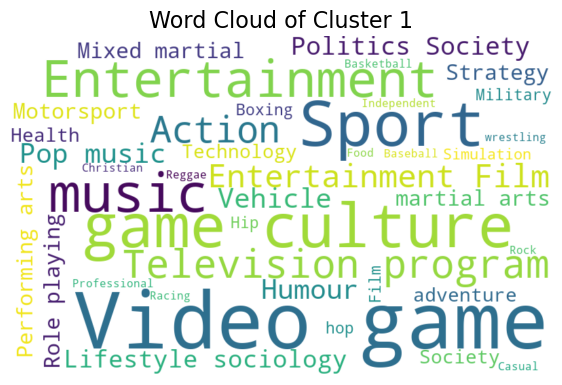

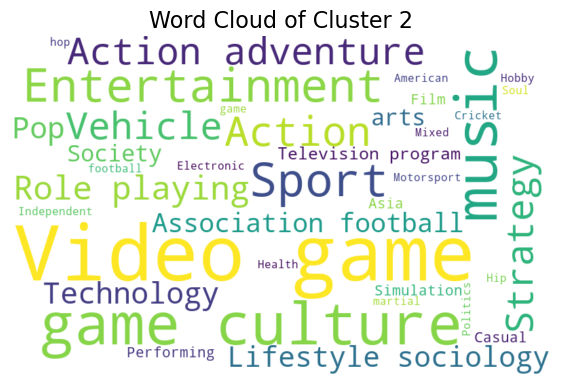

In [16]:
data["cluster_label"] = opt_labels
cluster_1 = data[data["cluster_label"] == 1]
cluster_3 = data[data["cluster_label"] == 3]
topic_data1 = " ".join(cluster_1['topicCategories'].drop_duplicates()).replace("_", " ")
topic_data3 = " ".join(cluster_3['topicCategories'].drop_duplicates()).replace("_", " ")


# Create the word cloud
wordcloud = WordCloud(
    width=800, height=500, background_color="white", colormap="viridis"
).generate(topic_data1)

# Plot the word cloud
plt.figure(figsize=(7,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axes
plt.title("Word Cloud of Cluster 1", fontsize=16)
plt.show()

# Create the word cloud
wordcloud = WordCloud(
    width=800, height=500, background_color="white", colormap="viridis"
).generate(topic_data3)

# Plot the word cloud
plt.figure(figsize=(7,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axes
plt.title("Word Cloud of Cluster 2", fontsize=16)
plt.show()